In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [ ]:
df = pd.read_csv("week12.csv")
df.head()

In [47]:
df = pd.read_csv("week12.csv")
df['o2.state'] = df['o2.state'].str.replace("\"","")
df['o1.min_memory'] = df['o1.min_memory'].str.replace("M","")
df['o1.min_memory'] = df['o1.min_memory'].str.replace("G","000")
df['e1'] = df['e1'].str.split("-").str[0]


label = LabelEncoder()
df['o2.state']=label.fit_transform(df['o2.state'])
df['o2']=label.fit_transform(df['o2'])
df['o3']=label.fit_transform(df['o3'])
df['o1.command']=label.fit_transform(df['o1.command'])
df.head()

,o1,o1.command,o1.min_memory,o1.state,o1.priority,o1.cpus,o1.work_dir,o2,o2.cpu,o2.free_mem,o2.state,o2.cpu_load,o3,e1,e1.reason
0,59509870,339,2540,RUNNING,NaN,4,/rwthfs/rz/cluster/home/oh751555/i14/hp_import...,282,96,213902,0,98.93,126,ended,NaN
1,59663240,415,2540,RUNNING,NaN,4,/rwthfs/rz/cluster/home/oh751555/i14/hp_import...,499,96,5299,0,95.91,126,ended,NaN
2,59871839,11195,32000,RUNNING,NaN,3,/rwthfs/rz/cluster/hpcwork/pb374595/00_DSME_Pr...,462,96,199475,0,96.23,272,ended,NaN
3,59780694,5784,5024,RUNNING,NaN,1,/rwthfs/rz/cluster/home/qq067313,388,96,448867,0,98.56,392,ended,NaN
4,59770776,11106,55000,RUNNING,NaN,10,/rwthfs/rz/cluster/home/ni574034,30,96,474779,0,96.10,133,failed,JobLaunchFailure


In [48]:
features = df[['o2.state',"o2.free_mem","o1.min_memory", "o2.cpu_load","o3", "o1.command"]]
target=df['e1']

X_train,x_test,Y_train,y_test = train_test_split(features,target,test_size=0.2, random_state=17)


In [49]:
model = DecisionTreeClassifier()

In [50]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [51]:
prediction = model.predict(x_test)

In [52]:
print(confusion_matrix(y_test,prediction))

[[67535  1313     9    79   188]
 [ 2191  3552     3    34    58]
 [   24     6    32     0     7]
 [  135    31     0   168     3]
 [  296   117     2     1   703]]


[Text(0.6572487462414203, 0.99, 'o1.command <= 11199.5\ngini = 0.176\nsamples = 305947\nvalue = [276694.0, 23184.0, 231.0, 1335.0, 4503.0]\nclass = y[0]'),
 Text(0.3501572444415264, 0.97, 'o1.command <= 901.5\ngini = 0.167\nsamples = 301131\nvalue = [273970, 21381, 222, 1300, 4258]\nclass = y[0]'),
 Text(0.5037029953414733, 0.98, 'True  '),
 Text(0.026505227256479646, 0.95, 'o3 <= 167.5\ngini = 0.053\nsamples = 90605\nvalue = [88139.0, 1889.0, 24.0, 9.0, 544.0]\nclass = y[0]'),
 Text(0.013293579889629639, 0.93, 'o1.min_memory <= 7000.0\ngini = 0.019\nsamples = 77393\nvalue = [76671, 253, 22, 6, 441]\nclass = y[0]'),
 Text(0.007513452120118572, 0.91, 'o3 <= 93.5\ngini = 0.007\nsamples = 74254\nvalue = [73977.0, 250.0, 11.0, 2.0, 14.0]\nclass = y[0]'),
 Text(0.003532554570059403, 0.89, 'o1.command <= 187.5\ngini = 0.298\nsamples = 441\nvalue = [362, 74, 0, 2, 3]\nclass = y[0]'),
 Text(0.0025190687647189776, 0.87, 'o2.state <= 3.0\ngini = 0.498\nsamples = 180\nvalue = [109.0, 66.0, 0.0, 2

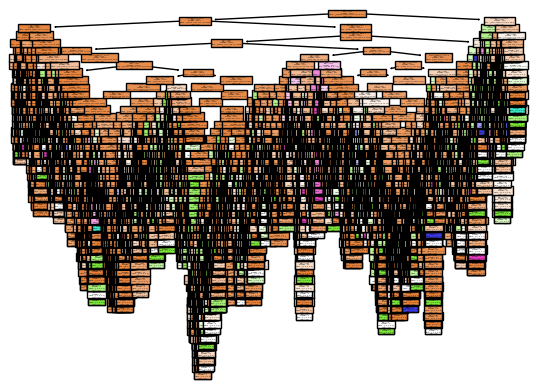

In [ ]:
# tree.plot_tree(model,feature_names=features.columns,class_names=True,filled=True)